In [1]:
import torch
import random
import numpy as np

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

In [2]:
import torchvision.datasets
MNIST_train = torchvision.datasets.MNIST('./', download=True, train=True)
MNIST_test = torchvision.datasets.MNIST('./', download=True, train=False)

In [3]:
X_train = MNIST_train.train_data
y_train = MNIST_train.train_labels
X_test = MNIST_test.test_data
y_test = MNIST_test.test_labels

c:\users\cyvar\pycharmprojects\tsyvarevsppr\venv\lib\site-packages\torchvision\datasets\mnist.py:62: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
c:\users\cyvar\pycharmprojects\tsyvarevsppr\venv\lib\site-packages\torchvision\datasets\mnist.py:52: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
c:\users\cyvar\pycharmprojects\tsyvarevsppr\venv\lib\site-packages\torchvision\datasets\mnist.py:67: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
c:\users\cyvar\pycharmprojects\tsyvarevsppr\venv\lib\site-packages\torchvision\datasets\mnist.py:57: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [4]:
X_train.dtype, y_train.dtype

(torch.uint8, torch.int64)

In [5]:
X_train = X_train.float()
X_test = X_test.float()

In [6]:
X_train.shape, X_test.shape

(torch.Size([60000, 28, 28]), torch.Size([10000, 28, 28]))

In [7]:
y_train.shape, y_test.shape

(torch.Size([60000]), torch.Size([10000]))

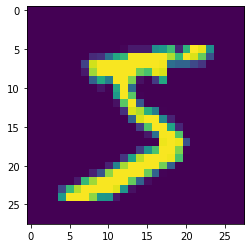

tensor(5)


In [8]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0, :, :])
plt.show()
print(y_train[0])

In [9]:
X_train = X_train.reshape([-1, 28 * 28])
X_test = X_test.reshape([-1, 28 * 28])

In [10]:
class MNISTNet(torch.nn.Module): 
    def __init__(self, n_hidden_neurons): 
        super(MNISTNet, self).__init__() 
        self.fc1 = torch.nn.Linear(28 * 28, n_hidden_neurons) 
        self.ac1 = torch.nn.Sigmoid() 
        self.fc2 = torch.nn.Linear(n_hidden_neurons, 10) 
    def forward(self, x): 
        x = self.fc1(x) 
        x = self.ac1(x) 
        x = self.fc2(x) 
        return x 
mnist_net = MNISTNet(100)

In [11]:
# torch.cuda.is_available()

In [12]:
# !nvidia-smi

In [13]:
# device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
# mnist_net = mnist_net.to(device)
# list(mnist_net.parameters())

In [14]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(mnist_net.parameters(), lr=1.0e-3)

In [15]:
batch_size = 100
# test_accuracy_history = []
# test_loss_history = []

# X_test = X_test.to(device)
# y_test = y_test.to(device)

for epoch in range(10000):
    order = np.random.permutation(len(X_train))
    
    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()
        
        batch_indexes = order[start_index:start_index+batch_size]
        
        X_batch = X_train[batch_indexes] #.to(device)
        y_batch = y_train[batch_indexes] #.to(device)
        
        preds = mnist_net.forward(X_batch) 
        
        loss_value = loss(preds, y_batch)
        loss_value.backward()
        
        optimizer.step()

    test_preds = mnist_net.forward(X_test)
#     test_loss_history.append(loss(test_preds, y_test))
    
    accuracy = (test_preds.argmax(dim=1) == y_test).float().mean()
#     test_accuracy_history.append(accuracy)
    print(accuracy)

tensor(0.9126)
tensor(0.9190)
tensor(0.9243)
tensor(0.9219)
tensor(0.9230)
tensor(0.9293)
tensor(0.9313)
tensor(0.9339)
tensor(0.9306)
tensor(0.9284)
tensor(0.9331)
tensor(0.9366)
tensor(0.9337)
tensor(0.9319)
tensor(0.9334)
tensor(0.9320)
tensor(0.9400)
tensor(0.9383)
tensor(0.9373)
tensor(0.9364)
tensor(0.9403)
tensor(0.9455)
tensor(0.9405)
tensor(0.9426)
tensor(0.9434)
tensor(0.9484)
tensor(0.9451)
tensor(0.9441)
tensor(0.9421)
tensor(0.9445)
tensor(0.9477)
tensor(0.9490)
tensor(0.9507)
tensor(0.9448)
tensor(0.9480)
tensor(0.9524)
tensor(0.9476)
tensor(0.9485)
tensor(0.9484)
tensor(0.9498)
tensor(0.9483)
tensor(0.9514)
tensor(0.9485)
tensor(0.9516)
tensor(0.9424)
tensor(0.9524)
tensor(0.9543)
tensor(0.9509)
tensor(0.9488)
tensor(0.9483)
tensor(0.9503)
tensor(0.9500)
tensor(0.9500)
tensor(0.9507)
tensor(0.9478)
tensor(0.9504)
tensor(0.9512)
tensor(0.9495)
tensor(0.9523)
tensor(0.9572)
tensor(0.9481)
tensor(0.9517)
tensor(0.9496)
tensor(0.9496)
tensor(0.9503)
tensor(0.9517)
tensor(0.9

KeyboardInterrupt: 